In [1]:
# Step 1
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2
# Installing other necessary libraries for twitter sentiment analysis
!pip install tweepy
!pip install textblob 
!pip install nltk
!pip install wordcloud
!pip install stopwords
!pip install vaderSentiment

In [3]:
# Step 3
# Importing the just installed libraries
import re
import tweepy
import textblob
import nltk
import wordcloud
import stopwords
import vaderSentiment
from stopwords import get_stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Step 4
# Created a twitter developer account to get these informations: My API keys and tokens 
api_key = "kRkDVWJAavdLtWFT6E4BlP"
api_key_secret = "UuP0p0bCm1uaksmenVFe6S4YJCbiNuD12EH5gt3T"
access_token = "1704904617518100481-AQ5hgqIVEKazR0vmcUxDubH"
access_token_secret = "kjNUwiPL0yld8bwy7x2avP0UkzPfKtpxhhcN"

In [ ]:
# Step 5
# Authenticating to Twitter
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
# Step 6
# Creating an API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Step 7
# Query Twitter for the keyword 'telemedicine'
query = "telemedicine -filter:retweets"  # Excluding retweets to avoid duplicates
max_tweets = 1000

In [ ]:
# Step 8
# Getting tweets
tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en", tweet_mode='extended').items(max_tweets)

In [ ]:
# Step 9
# Extraction of information
tweet_list = [[tweet.created_at, tweet.user.screen_name, tweet.full_text] for tweet in tweets]
# But the access was limited because it was a free twitter developer account

In [ ]:
# Step 10
# If access was granted, pandas would have been used as dataframe storage 
df = pd.DataFrame(tweet_list, columns=["Timestamp", "Username", "Tweet"])
print(df.head())

In [ ]:
# Step 11
# Saving the dataset in a csv file for future use, would have been next!
df.to_csv("tweets.csv", index=False)

In [4]:
# Step 4 (Alternative)
# An alternative method was getting a twitter sentiment dataset from Kaggle to continue from Step 3
# Loading the dataset
df = pd.read_csv('Tweets.csv')

In [5]:
# Step 5: Preview the uncleaned dataset for pre-cleaning process (Step 5 - Step 11 = Pre-cleaning Process)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [6]:
# Step 6: Count the number of rows and columns
print(df.shape)

(14640, 15)


In [7]:
# Step 7: Check dataset information (columns, data types, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
# Step 8: Changing tweet_created dtype from object to datetime format for analyzing trend over time
df['tweet_created'] = pd.to_datetime(df['tweet_created'], dayfirst=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9036\1167588324.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S %z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['tweet_created'] = pd.to_datetime(df['tweet_created'], dayfirst=True)


In [9]:
# Step 9: Re-preview the dataset information to confirm if the change has been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                    
---  ------                        --------------  -----                    
 0   tweet_id                      14640 non-null  int64                    
 1   airline_sentiment             14640 non-null  object                   
 2   airline_sentiment_confidence  14640 non-null  float64                  
 3   negativereason                9178 non-null   object                   
 4   negativereason_confidence     10522 non-null  float64                  
 5   airline                       14640 non-null  object                   
 6   airline_sentiment_gold        40 non-null     object                   
 7   name                          14640 non-null  object                   
 8   negativereason_gold           32 non-null     object                   
 9   retweet_count                 14640 non

In [10]:
# Preview the dataset
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01-08:00,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46-08:00,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15-08:00,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02-08:00,New Jersey,Eastern Time (US & Canada)


In [11]:
# Step 10: Check for missing values
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [12]:
# Step 11: Check for duplicate 
df.duplicated().sum()

36

In [13]:
# Step 12: Drop duplicates to start the cleaning process (Step 12 - Step 14 = Cleaning Process)
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [14]:
print(df.shape)

(14604, 15)


In [15]:
# Step 13: Fill the missing values
df['negativereason'].fillna("Can't Tell", inplace=True)
df['negativereason_confidence'].fillna(df['airline_sentiment_confidence'].mean(), inplace=True)

In [16]:
# Step 14: Fix missing values, drop unused columns
df.drop(columns=['tweet_id','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_location','user_timezone'], inplace=True)

In [17]:
# Step 15: Check the sentiment column distribution
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9159
neutral     3091
positive    2354
Name: count, dtype: int64

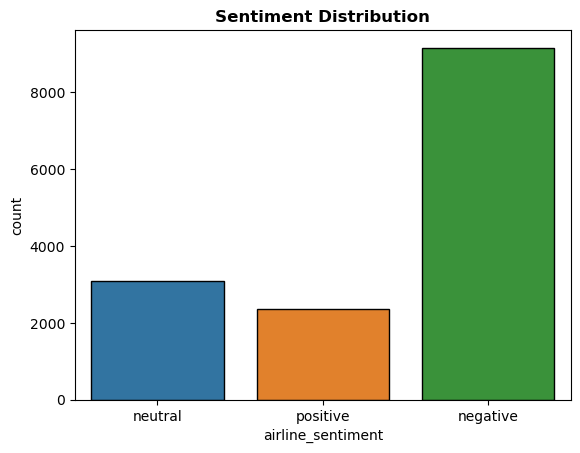

In [48]:
# Step 16: Visualize the distribution
sns.countplot(x='airline_sentiment', data=df, width=0.8, edgecolor='black')
plt.title('Sentiment Distribution', fontsize=12, fontweight='bold')
plt.show()

In [19]:
# Step 17: Using re to clean tweet (NLP Preprocessing)
# Define a function to clean the tweet text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    return text

In [20]:
# Step 18: Apply the cleaning function to the tweet column
df['cleaned_text'] = df['text'].apply(clean_text)

In [21]:
# Step 19: Retrieve English stopwords 
stop_words = get_stopwords("en")

In [22]:
# Step 20
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [23]:
# Step 21: Initialize VADER sentiment analyzer (NLP Sentiment Analysis)
sid = SentimentIntensityAnalyzer()

In [24]:
# Step 22: Apply VADER to each tweet and extract the sentiment score
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [25]:
# Step 23: Convert sentiment score to sentiment label
df['predicted_sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

In [49]:
# Step 24: Preview results
print(df[['cleaned_text', 'sentiment_score', 'predicted_sentiment']])

                                            cleaned_text  sentiment_score  \
0                                                   said           0.0000   
1          plus youve added commercials experience tacky           0.0000   
2           didnt today must mean need take another trip           0.0000   
3      really aggressive blast obnoxious entertainmen...          -0.3306   
4                                   really big bad thing          -0.5829   
...                                                  ...              ...   
14599                 thank got different flight chicago           0.3612   
14600  leaving minutes late flight warnings communica...          -0.7003   
14601                     please bring american airlines           0.3182   
14602  money change flight dont answer phones suggest...           0.3818   
14603  ppl need know many seats next flight plz put u...           0.0772   

      predicted_sentiment  
0                 neutral  
1                 n

In [27]:
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,cleaned_text,sentiment_score,predicted_sentiment
0,neutral,1.0000,Can't Tell,0.899923,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,said,0.0000,neutral
1,positive,0.3486,Can't Tell,0.000000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,plus youve added commercials experience tacky,0.0000,neutral
2,neutral,0.6837,Can't Tell,0.899923,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,didnt today must mean need take another trip,0.0000,neutral
3,negative,1.0000,Bad Flight,0.703300,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,negative,1.0000,Can't Tell,1.000000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,really big bad thing,-0.5829,negative
...,...,...,...,...,...,...,...,...,...,...
14599,positive,0.3487,Can't Tell,0.000000,American,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01-08:00,thank got different flight chicago,0.3612,positive
14600,negative,1.0000,Customer Service Issue,1.000000,American,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46-08:00,leaving minutes late flight warnings communica...,-0.7003,negative
14601,neutral,1.0000,Can't Tell,0.899923,American,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15-08:00,please bring american airlines,0.3182,positive
14602,negative,1.0000,Customer Service Issue,0.665900,American,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02-08:00,money change flight dont answer phones suggest...,0.3818,positive


In [28]:
# Step 24: Compare the predicted_sentiment against airline_sentiment
df['match'] = df['airline_sentiment'] == df['predicted_sentiment']

In [29]:
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,cleaned_text,sentiment_score,predicted_sentiment,match
0,neutral,1.0000,Can't Tell,0.899923,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,said,0.0000,neutral,True
1,positive,0.3486,Can't Tell,0.000000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,plus youve added commercials experience tacky,0.0000,neutral,False
2,neutral,0.6837,Can't Tell,0.899923,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,didnt today must mean need take another trip,0.0000,neutral,True
3,negative,1.0000,Bad Flight,0.703300,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,really aggressive blast obnoxious entertainmen...,-0.3306,negative,True
4,negative,1.0000,Can't Tell,1.000000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,really big bad thing,-0.5829,negative,True
...,...,...,...,...,...,...,...,...,...,...,...
14599,positive,0.3487,Can't Tell,0.000000,American,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01-08:00,thank got different flight chicago,0.3612,positive,True
14600,negative,1.0000,Customer Service Issue,1.000000,American,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46-08:00,leaving minutes late flight warnings communica...,-0.7003,negative,True
14601,neutral,1.0000,Can't Tell,0.899923,American,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15-08:00,please bring american airlines,0.3182,positive,False
14602,negative,1.0000,Customer Service Issue,0.665900,American,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02-08:00,money change flight dont answer phones suggest...,0.3818,positive,False


In [30]:
# Step 25: Calculate the accuracy
accuracy = df['match'].mean()
print(f"VADER Accuracy: {accuracy:.2%}")

VADER Accuracy: 50.21%


In [31]:
# Step 26: Import a library to plot a heatmap chart of a confusion matrix to determine correlation between predicted_sentiment and airline_sentiment
from sklearn.metrics import confusion_matrix

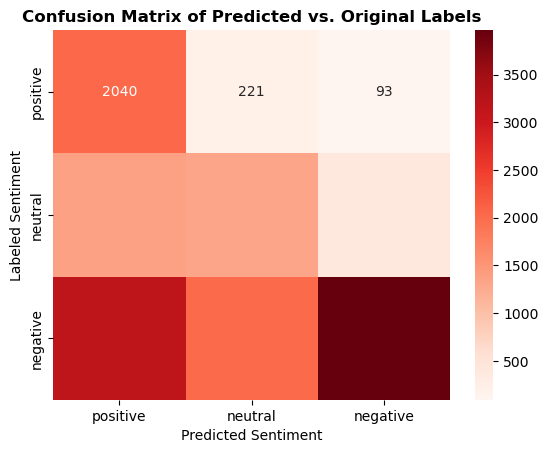

In [41]:
# Step 27: Generate confusion matrix
cm = confusion_matrix(df['airline_sentiment'], df['predicted_sentiment'], labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Labeled Sentiment')
plt.title('Confusion Matrix of Predicted vs. Original Labels', fontsize=12, fontweight='bold')
plt.show()

In [33]:
# Step 28: Group by date and sentiment for trend analysis
sentiment_trends = df.groupby([df['tweet_created'].dt.date, 'airline_sentiment']).size().unstack()

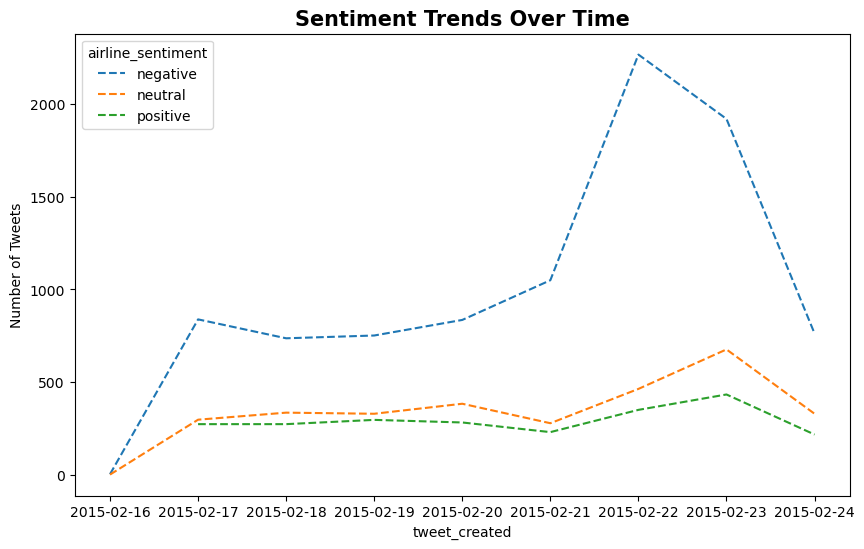

In [40]:
# Step 29: Plot sentiment trends over time
sentiment_trends.plot(figsize=(10, 6), linestyle='--')
plt.title('Sentiment Trends Over Time',fontsize=15, fontweight='bold', color='black')
plt.ylabel('Number of Tweets')
plt.show()

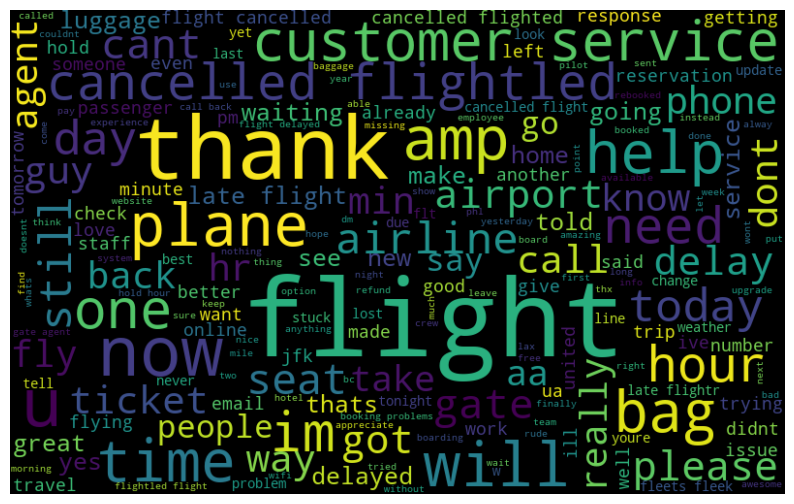

In [51]:
# Step 30: Using wordcloud to visual frequent words in tweets
from wordcloud import WordCloud

all_words = " ".join([text for text in df['cleaned_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()